# 01a - Detect handwritten digits - student

## General

The problem we’re trying to solve here is to classify grayscale images of handwritten digits (28 × 28 pixels) into their 10 categories (0 through 9).  
We’ll use the MNIST dataset, which has been around almost as long as the field itself and has been intensively studied.  
It’s a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. 

The MNIST dataset comes preloaded in Keras, in the form of a set of four Numpy arrays.

> Note! Inside code cells  '`# ToDo: `' comment shows the place where additional code is needed.

## Installations and tests of the environment

In [1]:
# NOTE! Run this cell only once, if needed (no tensorflow or keras installed)
# DO NOT INSTALL ON LOCAL ANACONDA ENVIRONMENT
# BUT IF U USE GOOGLE DRIVE's COLABORATORY, 
# THEN RUN THIS ONCE
#try:
  # %tensorflow_version only exists in Colab.
#  %tensorflow_version 2.x
#except Exception:
#  pass

# install tensorflow and keras
# !pip install tensorflow
# !pip install keras

# update version (to 2.2.0)
# !pip install --upgrade tensorflow

In [2]:
import tensorflow as tf
# this is for Apple silicon only (to receive accuracy close to 0.99)
# tf.config.set_visible_devices([], "GPU")  # CPU-only for deterministic teaching results

import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers

import matplotlib.pyplot as plt

# ToDo: ensure that tensorflow is installed by printing the version numbers
print(tf.version.VERSION)


2.19.1


### Load dataset

In [3]:
# Load dataset
# train_images and train_labels form the training set, (the data that the model will learn from). 
# The model will then be tested on the test set, test_images and test_labels.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# The images are encoded as Numpy arrays, and the labels are an array of digits, ranging from 0 to 9. 
# The images and labels have a one-to-one correspondence.
# TODO: Find out train and test set features
print(f"train images shape {train_images.shape}")
print(f"train labels shape {train_labels.shape}")

print(f"test images shape {test_images.shape}")
print(f"test labels shape {test_labels.shape}")

print(f"Some train labels: {train_labels[:5]}")
print(f"Some test labels: {test_labels[:5]}")


train images shape (60000, 28, 28)
train labels shape (60000,)
test images shape (10000, 28, 28)
test labels shape (10000,)
Some train labels: [5 0 4 1 9]
Some test labels: [7 2 1 0 4]


Should be equal (train): 5


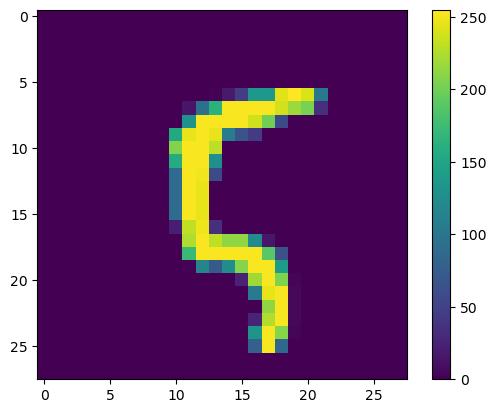

Should be equal (test): 6


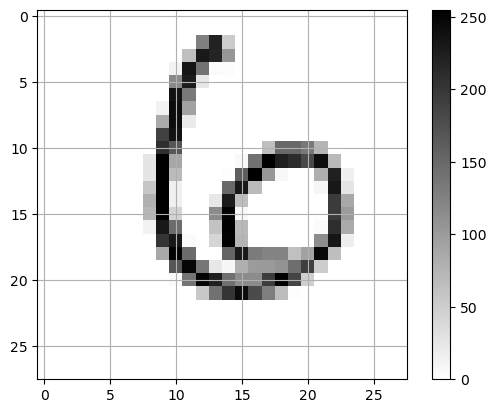

In [4]:
# ToD0: Plot some images
idx = 100
plt.figure()
print('Should be equal (train):',train_labels[idx])
plt.imshow(train_images[idx])
plt.colorbar()
plt.grid(False)
plt.show()

# cmap shows image with grey colors with cmap param
idx = 100
print('Should be equal (test):',test_labels[idx])
digit = test_images[idx]
plt.imshow(digit, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(True)
plt.show()


## Workflow

The workflow will be as follows: 

- First, we’ll feed the neural network the training data, train_images and train_labels. 
- The network will then learn to associate images and labels. 
- Finally, we’ll ask the network to produce predictions for test_images, and we’ll verify whether these predictions match the labels from test_labels.

### Build the network

The core building block of neural networks is the layer, a data-processing module that you can think of as a filter for data. Some data goes in, and it comes out in a more useful form. Most of deep learning consists of chaining together simple layers that will implement a form of progressive data distillation. A deep-learning model is like a sieve for data processing, made of a succession of increasingly refined data filters—the layers.

Here, our network consists of a sequence of two Dense layers, which are densely connected (also called fully connected) neural layers. The second (and last) layer is a 10-way softmax layer, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

In [5]:
# ToDo: create a sequential model with 
# - input shape of 28 x 28 pixel image
# - one hidden fully connected layer of 512 neurons with activation function 'relu'
# - fully connected output layer of 10 neurons with softmax activation 

# empty network
network = models.Sequential()

# add first layer
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

# ToDo: print the network summary
network.summary()



c:\Users\Parrot\anaconda3\envs\ANACONDA_NEURAL_NETWORKS_ENV\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

To make the network ready for training, we need to pick three more things, as part
of the compilation step:

- A loss function — How the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.
- An optimizer — The mechanism through which the network will update itself based on the data it sees and its loss function.
- Metrics to monitor during training and testing — Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).

In [6]:
# ToDo: Prepare network ready for training using compile() method
# - optimizer is 'rmsprop' or 'adam' (find out suitable learning_rate)
# - loss function uses 'categorical_crossentropy', 
# - metrics used is 'accuracy'
use_RMSprop = True
if (use_RMSprop):
    print("Using RMSprop optimizer")
    opt = tf.keras.optimizers.RMSprop(learning_rate=1e-4)
else:
    print("Using Adam optimizer")
    opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
network.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Using RMSprop optimizer


### Prepare the data for training

Before training, we’ll preprocess the data by reshaping it into the shape the network expects and scaling it so that all values are in the \[0, 1\] interval. Our training images were stored in an array of shape (60000, 28, 28) of type uint8 with values in the \[0, 255\] interval. We transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1. And we also need to categorically encode the labels

In [7]:
print(train_labels.shape)
print(train_labels[:5])

(60000,)
[5 0 4 1 9]


In [8]:
# ToDo: Prepare the image data
# - modify shape (60000,28,28) to (6000,784)
# - scale values from range [0..255] to [0..1]

train_images_scaled = train_images.reshape((train_images.shape[0], 28*28)).astype('float32') / 255.0
test_images_scaled = test_images.reshape((test_images.shape[0], 28*28)).astype('float32') / 255.0
print(train_images_scaled.shape)
print(train_labels.shape)
print(test_images_scaled.shape)
print(test_labels.shape)



(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [9]:
print(np.max(train_images_scaled))
print(np.max(train_labels))
print(np.max(test_images_scaled))
print(np.max(test_labels))

1.0
9
1.0
9


In [10]:
# ToDo: one hot encode the labels
# one hot encoding helps to avoid neural network giving large numbers "better" value
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [11]:

print(train_labels.shape)
print(train_labels[:5])

print(test_labels.shape)
print(test_labels[:5])

(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
(10000, 10)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [12]:
# ToDo: Shuffle training set once before training
idx2 = np.random.permutation(len(train_images_scaled))
train_images = train_images_scaled[idx2]
train_labels = train_labels[idx2]

### Train the network

We’re now ready to train the network, which in Keras is done via a call to the `network’s fit method` — we fit the model to its training data:

In [13]:
# ToDo: train the network (=fit the model)
# - use 20 epochs with batch_size of 128
history = network.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.1, verbose=1)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8450 - loss: 0.6839 - val_accuracy: 0.9025 - val_loss: 0.3505
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9176 - loss: 0.3029 - val_accuracy: 0.9170 - val_loss: 0.2723
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9317 - loss: 0.2482 - val_accuracy: 0.9313 - val_loss: 0.2329
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9403 - loss: 0.2146 - val_accuracy: 0.9405 - val_loss: 0.2038
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9472 - loss: 0.1905 - val_accuracy: 0.9448 - val_loss: 0.1859
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9527 - loss: 0.1713 - val_accuracy: 0.9517 - val_loss: 0.1703
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9572 - loss: 0.1551 - val_accuracy: 0.9533 - val_loss: 0.1550
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9602 - loss: 0.1420 - val_accuracy: 0.

> Note! Two quantities are displayed during training: the loss of the network over the training data, and the accuracy of the network over the training data. We quickly reach an accuracy of 0.989 (98.9%) on the training data. 

Now let’s check that the model performs well on the test set, too:

### Run the test set

In [14]:
print(test_images_scaled.shape)
print(test_labels.shape)

(10000, 784)
(10000, 10)


In [15]:
# ToDo: evaluate the model accuracy using test set and print the accuracy
test_loss, test_acc = network.evaluate(test_images_scaled, test_labels, verbose=2)
print(f"test_accuracy: {test_acc}, test_loss: {test_loss} ")

313/313 - 0s - 1ms/step - accuracy: 0.9760 - loss: 0.0853
test_accuracy: 0.9760000109672546, test_loss: 0.08528625220060349 


The testset accuracy turns out to be 97.6% — that’s a bit lower than the training set accuracy. This gap between training accuracy and test accuracy is an example of overfitting: the fact that machine-learning models tend to perform worse on new data than on their training data. 

### Predict numbers 

models are optimized to make predictions on a batch, or collection, of examples at once. Thus, even using a single image, one needs to add it to a list:

In [16]:
# ToDo: predict a single number
